In [1]:
import pyfolio as pf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import pandas_datareader.data as web
from pathlib import Path
import seaborn as sns
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import matplotlib.colors as colors
import matplotlib.transforms as bbox
from matplotlib import rcParams
import nest_asyncio

import socket
if socket.gethostname() == 'edmunds-mbp.lan':
    %config InlineBackend.figure_format = 'retina'
    
opt_path = '/Users/ebellord/PycharmProjects/opt_trade'
if  opt_path not in sys.path:
    sys.path.append(opt_path)
from option_simulation import OptionSimulation, OptionTrades
from spx_data_update import UpdateSP500Data
from option_utilities import perf_stats, grid_ticks_format, invisible_spines, color_axis

nest_asyncio.apply()
%time opt_sim = OptionSimulation(update_simulation_data=True)

Option files not updated
CPU times: user 7.33 s, sys: 1.87 s, total: 9.2 s
Wall time: 7 s


# Simulation Parameters
Setup simulation parameters, leverage and simulation index.

In [2]:
z_score = -1
duration = 2
leverage = 2
sim_idx = 0
%time sim_output = [opt_sim.trade_sim(z_score, duration, trade_day_type=day_type) \
                    for day_type in ['EOM']]

Running Simulation - trade_day_type:EOM | Z-score -1 | Duration 2 | Option Type:P
CPU times: user 35 s, sys: 2.18 s, total: 37.2 s
Wall time: 34.6 s


In [3]:
opt_trade = [OptionTrades(sim, leverage=leverage) for sim in sim_output]
performance = [trade.performance_summary for trade in opt_trade]
simulation_dates = [trade.simulation_parameters.sim_dates_live for trade in opt_trade]
perf = pd.concat(performance, axis=1, sort=False)
display(perf.style)
out_path = Path.home() / 'Dropbox' / 'outputDev' / 'fig'
returns = opt_trade[sim_idx].returns
return_index = opt_trade[sim_idx].return_index

,EOMP-1L2.0
StartDate,"Jan 30, 2004"
EndDate,"Apr 02, 2019"
Leverage,2
ZScore,-1
Avg_Days,35.285
annual_return,0.0976755
annual_volatility,0.13338
sharpe_ratio,0.76618
calmar_ratio,0.295965
stability_of_timeseries,0.989264


# Charting-functions-and-constants

In [4]:
font_size = 9
fig_path = Path.home() / 'Dropbox' / 'outputDev' / 'fig'
rcParams['font.sans-serif'] = 'Roboto Condensed'
rcParams['font.family'] = "sans-serif"
bb = bbox.Bbox([[0.25, 0.25], [7.46, 4.2]])
fig_size = (8, 4.5) #16/9 Aspect ratio
text_color_light = '#3f5378'
text_color_dark = '#263248'
text_color_yellow = '#ff9800'

/Users/ebellord/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1a193d8860> has a label of '_no_legend' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/ebellord/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


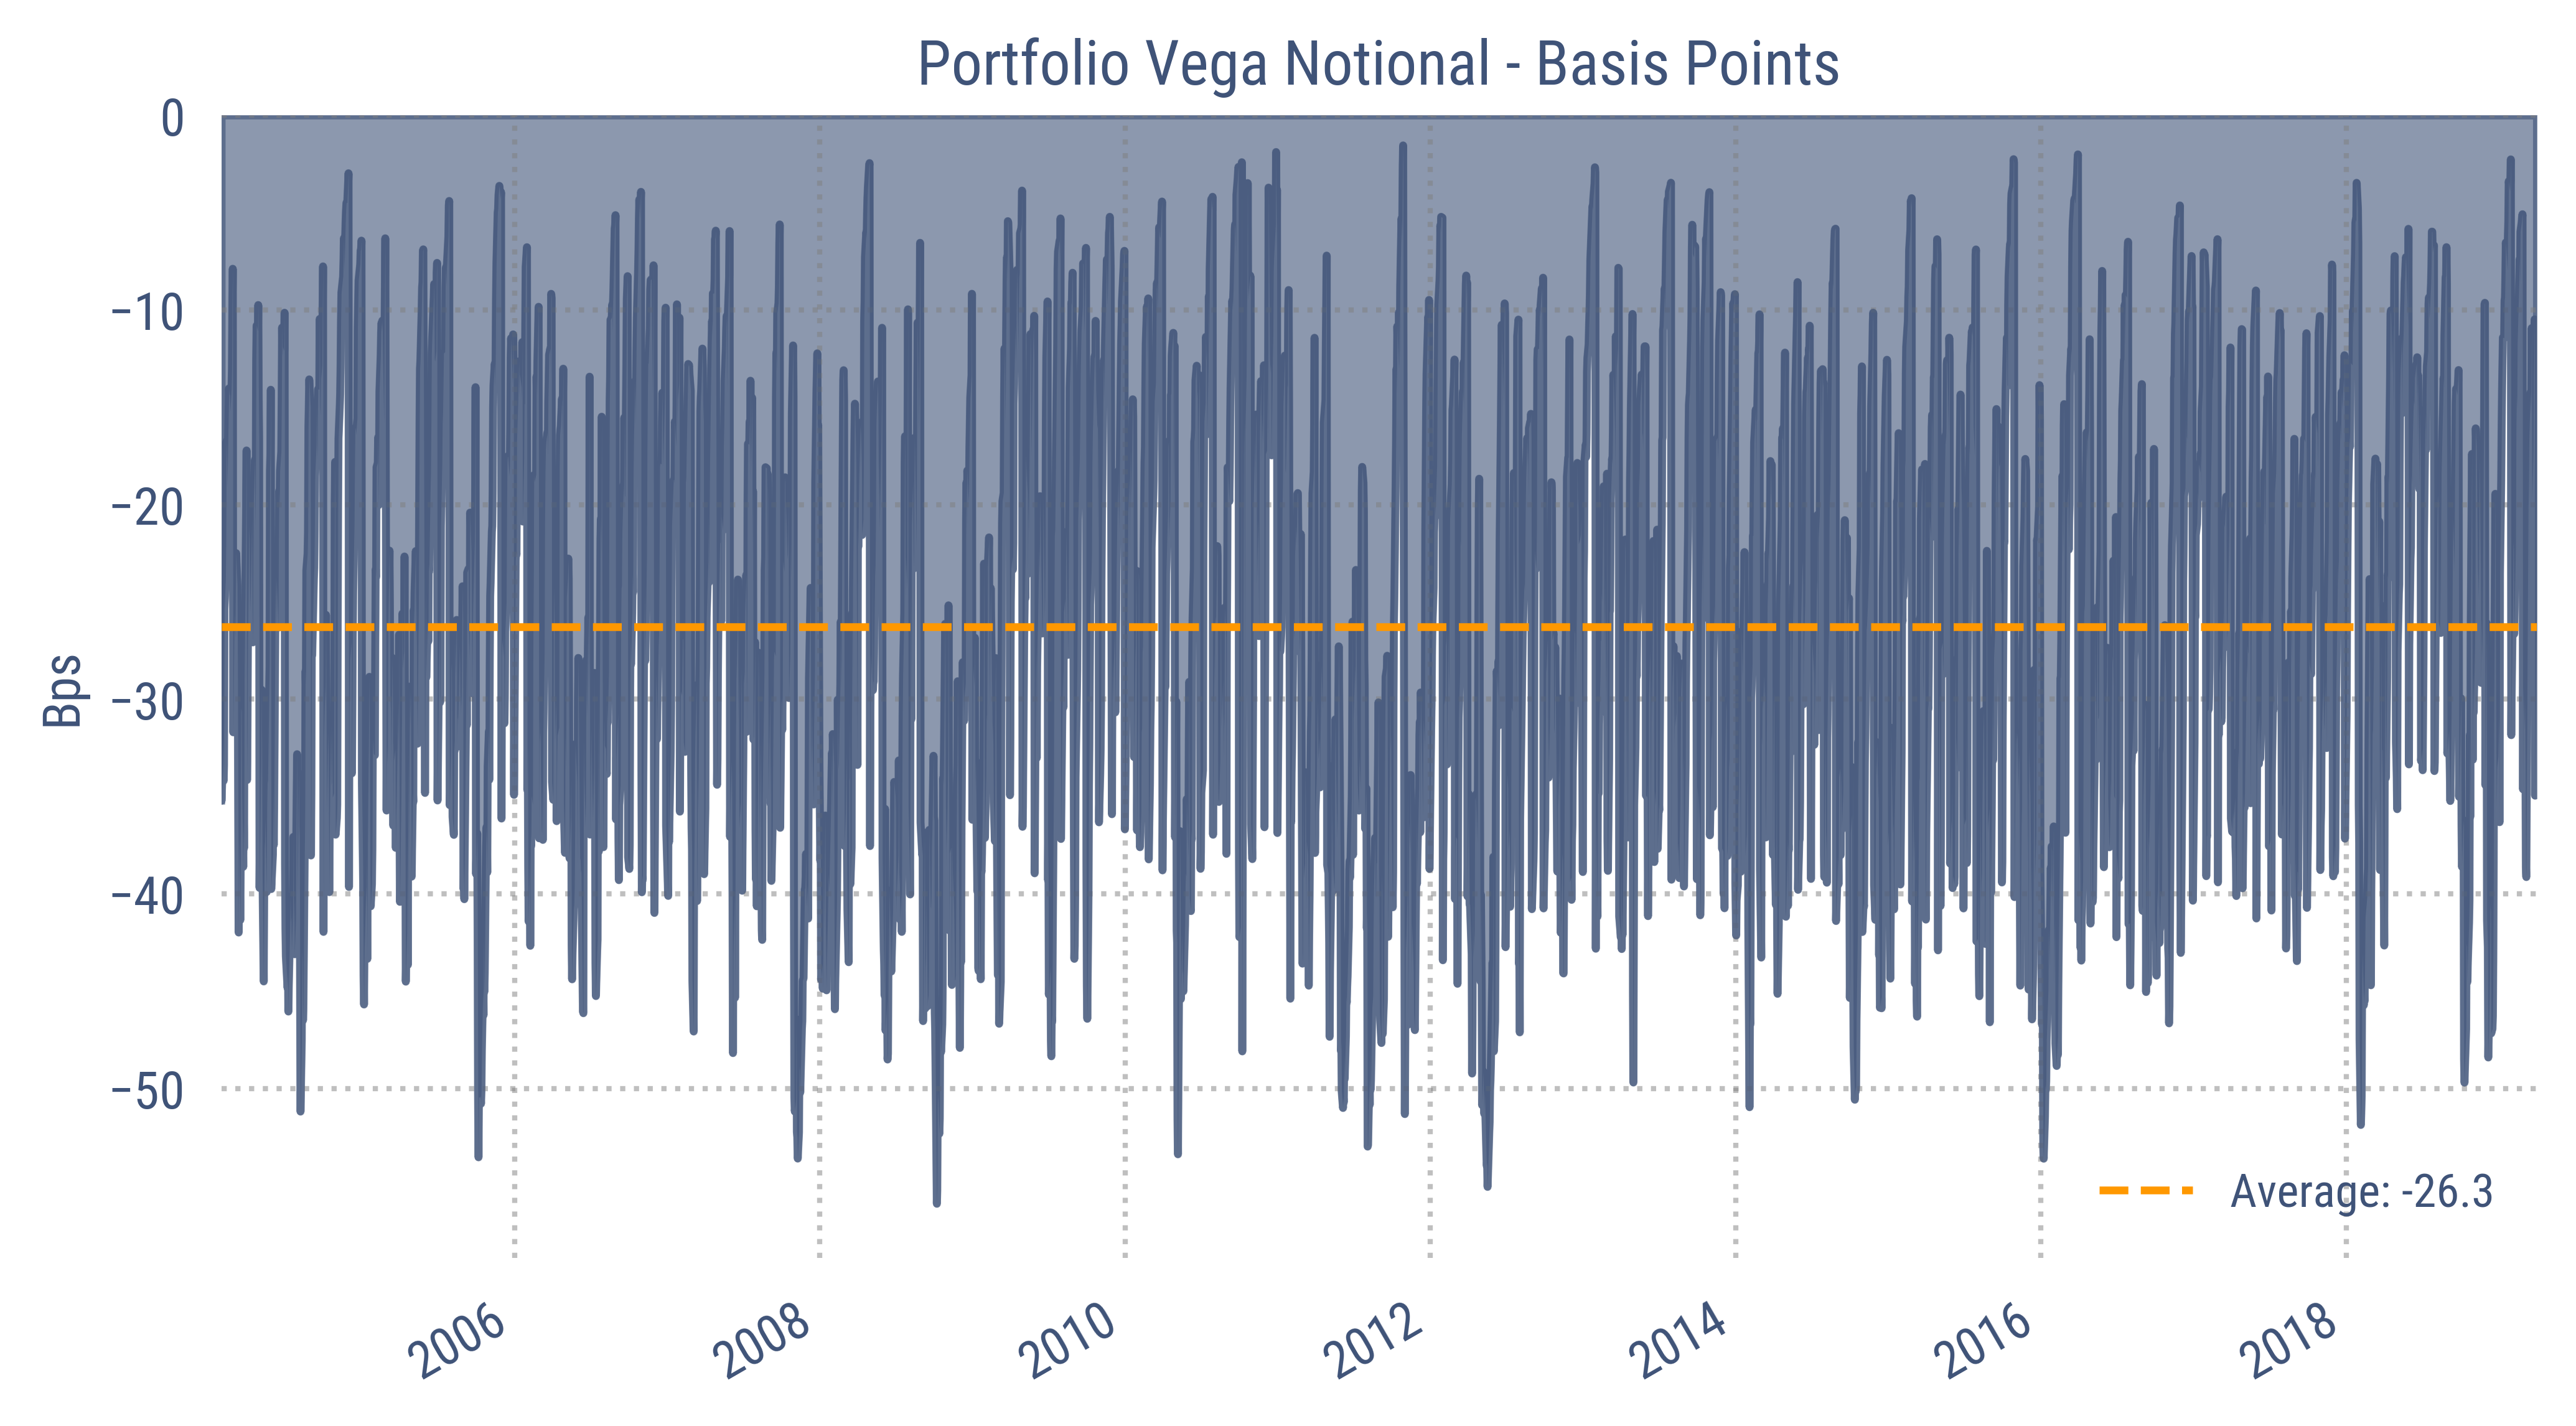

In [6]:
vega_notional_bps = ((opt_trade[sim_idx].greeks['vega_1545'] \
                * leverage)/ opt_trade[sim_idx].greeks['active_underlying_price_1545']) * 10000
fig = plt.figure(figsize=fig_size,
                 dpi=600, 
                 facecolor='None', 
                 edgecolor='None')
gs = gridspec.GridSpec(1, 1, wspace=0.5, hspace=0.25)
ax_vega_bps = plt.subplot(gs[:])

vega_notional_bps.plot(kind='area', color=text_color_light, lw=1.5
                       ,ax=ax_vega_bps, grid=True, alpha=0.6,
                       title ='Portfolio Vega Notional - Basis Points')

plt.axhline(vega_notional_bps.mean(),
                 color=text_color_yellow,
                 ls='--',
                 lw=1.5,
                 alpha=1.0)
greek_leg = ax_vega_bps.legend(['_no_legend', 'Average: {:0.1f}'.format(vega_notional_bps.mean())],
                               fancybox=True,
                               framealpha=0.0,
                               prop={'size': font_size})

[(text.set_size(font_size), text.set_color(text_color_light)) for text in greek_leg.get_texts()]
ax_vega_bps.set_ylabel('Bps')    
ax_vega_bps.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
grid_ticks_format([ax_vega_bps])
color_axis(ax_vega_bps, text_color_light)
invisible_spines(ax_vega_bps)
plt.autoscale(enable=True,
              axis='x',
              tight=True)
fig.tight_layout(pad=0)

